In [1]:
from weavepy import *
from config import BDD_VERSION
sns.set_context("talk")

In [2]:
# --- Parameters for loading data ---
# It is expected that these will be changed rarely
## Variables
climate_variable = "TA"
energy_variable = "SPV"
techno = "60" # Techno needs to be specified for energy variables
## Temporal aggregation
aggregation_frequency = "D"
aggregation_function = "mean"
## Selection
country = "FR"
models = []
scenarios = []

In [3]:
data = load_vars([climate_variable, energy_variable], bdd_version = BDD_VERSION,
              countries = [country], technos = ["NA", techno], models = models, scenarios = scenarios, 
              aggregation_frequency = aggregation_frequency, aggregation_function = aggregation_function,
              verbose=True)

Loading country n°1/1 (FR)
|_Variable n°1/2 (TA)
|__Techno n°1/1 (NA)
|__ > File already exists, loading from cache: /data/sbourdin/PECD42_cache_data/PECD42/TA_NA_D-mean_FR_PECD42.nc
|_Variable n°2/2 (SPV)
|__Techno n°1/1 (60)
|__ > File already exists, loading from cache: /data/sbourdin/PECD42_cache_data/PECD42/SPV_60_D-mean_FR_PECD42.nc


In [4]:
# --- Period ---
# These can be changed and adjusted easily
historical_period = (1990, 2020)
future_period = (2070, 2100)

In [5]:
# --- Thresholds ---
# These can be changed and adjusted easily
## Climate
climate_variable_comparison = '<=' # '<', '<=', '>', or '>='
climate_variable_threshold = 5 # Number in units of variable
## Energy 
energy_variable_comparison = '<' # '<', '<=', '>', or '>='
energy_variable_threshold = 0.05 # Number in units of variable

In [6]:
# Identify problematic days
climate_days = identify_pb_days(data[climate_variable], climate_variable_comparison, climate_variable_threshold).rename("climate_event")
energy_days = identify_pb_days(data[energy_variable], energy_variable_comparison, energy_variable_threshold).rename("energy_event")
compound_days = (climate_days & energy_days).rename("compound_event")

In [7]:
# Identify events
climate_events = identify_events_whole_base(climate_days)
energy_events = identify_events_whole_base(energy_days)
compound_events = identify_events_whole_base(compound_days)

100%|██████████| 35/35 [00:00<00:00, 99.75it/s] 


In [8]:
# Compute number of events per year
N_climate_events, N_energy_events, N_compound_events = [count_events(e) for e in [climate_events, energy_events, compound_events]]

In [9]:
nb_event_timeseries_plotly_multi([N_climate_events, N_energy_events, N_compound_events])

FigureWidget({
    'data': [{'hovertemplate': 'scenario=SP126<br>model=AWI-_AWCM<br>year=%{x}<br>n_events=%{y}<extra></extra>',
              'legendgroup': 'SP126, AWI-_AWCM',
              'line': {'color': 'rgb(23,60,102)', 'dash': 'dot'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'SP126, AWI-_AWCM',
              'opacity': 0.2,
              'showlegend': True,
              'type': 'scattergl',
              'uid': 'a5198a9d-0c20-401a-9e49-577b8a52b4c4',
              'x': {'bdata': ('AAAAAAAA+H8AAAAAAAD4fwAAAAAAAP' ... 'AAAPh/AAAAAAAA+H8AAAAAAAD4fw=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAA+H8AAAAAAAD4fwAAAAAAAP' ... 'AAAPh/AAAAAAAA+H8AAAAAAAD4fw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'scenario=SP126<br>model=BCC-_BCCS<br>year=%{x}<br>n_events=%{y}<extra></extra>',
              'legendgroup': 'SP

In [10]:
event_duration_hist_plotly_multi([climate_events, energy_events, compound_events], historical_period, future_period)

FigureWidget({
    'data': [{'fill': 'tozeroy',
              'fillcolor': 'rgba(23,60,102,0.15)',
              'hovertemplate': '%{x}<br>proportion: %{y:.3f}<extra></extra>',
              'legendgroup': np.str_('SP126'),
              'line': {'color': 'rgb(23,60,102)', 'width': 3},
              'mode': 'lines',
              'name': np.str_('SP126'),
              'showlegend': True,
              'type': 'scatter',
              'uid': 'd7353e6f-b2d5-4048-b725-23ed090cf8d2',
              'x': {'bdata': ('AAAAAAAA4D8AAAAAAAD4PwAAAAAAAP' ... 'AAAIA8QAAAAAAAgDxAAAAAAACAPUA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('bC1As/jn0D9sLUCz+OfQP/meYHPmK8' ... '0lcfRJP/o/nSVx9Ek/+j+dJXH0ST8='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'legendgroup': np.str_('SP126'),
              'line': {'color': 'rgb(23,60,102)', 'dash': 'dash', 'width': 2},
              'mode': 'lines',
              'name': 'S

In [11]:
event_seasonality_kde_plotly_multi([climate_days, energy_days, compound_days])

FigureWidget({
    'data': [{'customdata': {'bdata': ('AAAAAADQZsAUqPUrBVpmwClQ61cK5G' ... 'tXCuRlQBWo9SsFWmZAAAAAAADQZkA='),
                             'dtype': 'f8'},
              'hovertemplate': 'DOY: %{customdata:.0f}<br>Density: %{r:.3f}<extra></extra>',
              'legendgroup': np.str_('SP126'),
              'line': {'color': 'rgb(23,60,102)'},
              'mode': 'lines',
              'name': np.str_('SP126'),
              'r': {'bdata': ('vt4rBwdCYDcB3wIiW315Nqt6fKhMko' ... '36n4MQOY2D53Y3fzw4cd8rBwdCYDc='),
                    'dtype': 'f8'},
              'showlegend': True,
              'subplot': 'polar',
              'theta': {'bdata': ('AAAAAACAZsCLLrroogtmwBdddNFFl2' ... 'TRRZdlQIwuuuiiC2ZAAAAAAACAZkA='),
                        'dtype': 'f8'},
              'type': 'scatterpolar',
              'uid': 'dd6bfbcb-2a10-47b0-be05-bb9aea0b89ac'},
             {'customdata': {'bdata': ('AAAAAADQZsAUqPUrBVpmwClQ61cK5G' ... 'tXCuRlQBWo9SsFWmZAAAAAAADQZkA='),
    

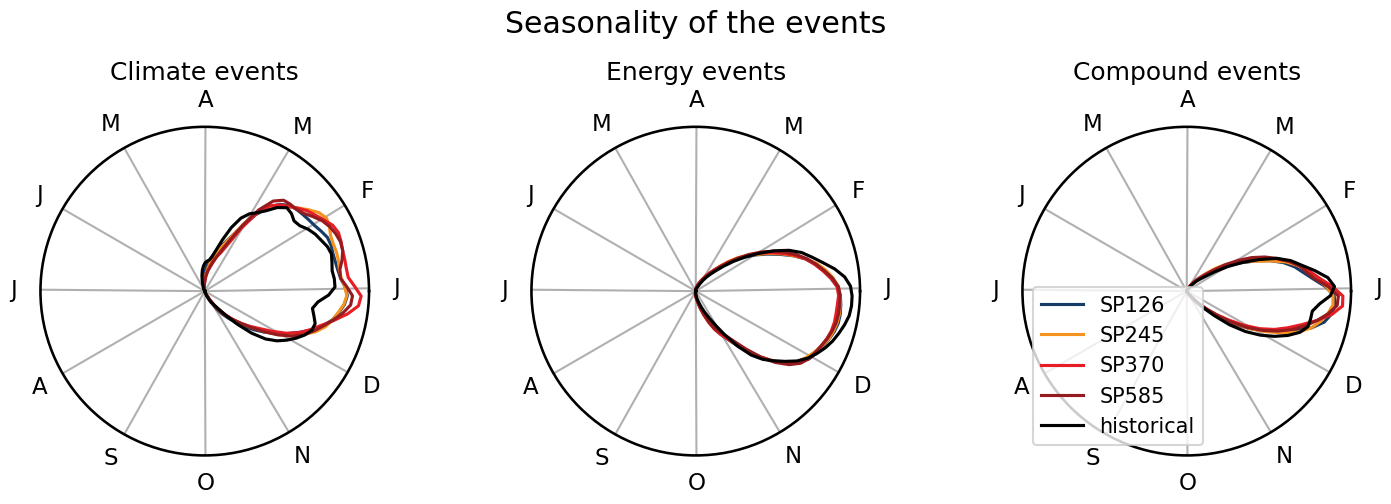

In [12]:
event_seasonality_kde(climate_days, energy_days, compound_days)